In [20]:
import numpy as np 
import pandas as pd
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data_train=pd.read_csv("train.csv")

In [22]:
data_train.head()
#data_train.isnull()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [23]:
data_train.shape

(14999, 9)

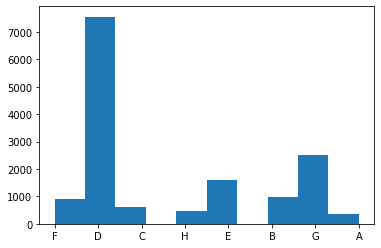

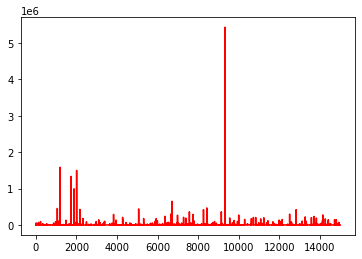

(14998, 9)


In [24]:
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"],color="r")
plt.show()

#remove videos adviews with greater than 2000000 as outlier
data_train = data_train[data_train["adview"] < 2000000]
print(data_train.shape)

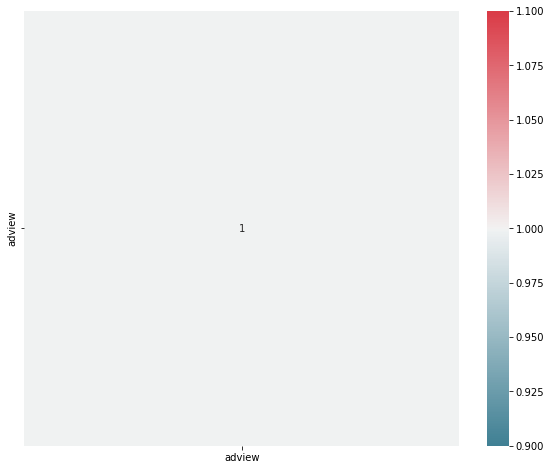

In [25]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [26]:
#data_train.category.unique()
print(data_train.shape)

(14998, 9)


In [27]:

# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [28]:
# print (data_train.category.unique())
# print (data_train.vidid.unique())
# print (data_train.adview.unique())
# print(( data_train.views.unique()))
# print ((data_train.duration.unique()))

In [29]:
#removinng charecter "F" present in data
data_tran = data_train[data_train.views!= "F"]
data_tran = data_train[data_train.likes!= "F"]
data_tran = data_train[data_train.dislikes!= "F"]
data_tran = data_train[data_train.comment!= "F"]

# #convert all values to integers

# data_train["views"] = pd.to_numeric(data_train["views"])
# data_train["comment"] = pd.to_numeric(data_train["comment"])
# data_train["likes"] = pd.to_numeric(data_train["likes"])
# data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
# data_train["adview"]=pd.to_numeric(data_train["adview"])
# #data_train = data_train['views'].replace(',', '.', regex=True).astype(float)
print(data_train.shape)

(14636, 9)


In [30]:
#convert all values to integers

# data_train["views"] = pd.to_numeric(data_train["views"])
# data_train["comment"] = pd.to_numeric(data_train["comment"])
# data_train["likes"] = pd.to_numeric(data_train["likes"])
# data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
# data_train["adview"]=pd.to_numeric(data_train["adview"])
# data_train = data_train['views'].replace(',', '.', regex=True).astype(float)
# column_vidid=data_train['vidid']

# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']
print(data_train.shape)


(14636, 9)


In [31]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [32]:
#convert Time_in _sec for duration
import datetime
import time


In [33]:
def checklist(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    p = ['H', 'M', 'S']
    for i in y:
        if i not in p:
            mm += i
        else:
            if i == "H":
                h = mm
                mm = ''
            elif i == "M":
                m = mm
                mm = ''
    if h == '':
        h = '00'
    if m == '':
        m = '00'
    if s == '':
        s = '00'
    bp = h + ':' + m + ':' + s
    return bp

Train = pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]

# Ensure 'checkli' handles unexpected or missing values
time = mp.apply(checklist)

def func_sec(time_string):
    if not time_string:
        return 0  # Return 0 for empty strings

    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1 = time.apply(func_sec)

data_train["duration"] = time1
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,420,6
1,2741,2,1707,56,2,6,2185,540,4
2,8138,1,2023,25,0,2,2094,120,3
3,9004,6,620860,777,161,153,2119,240,8
4,122,1,666,1,0,0,2091,0,4


In [34]:
data_train.shape

(14636, 9)

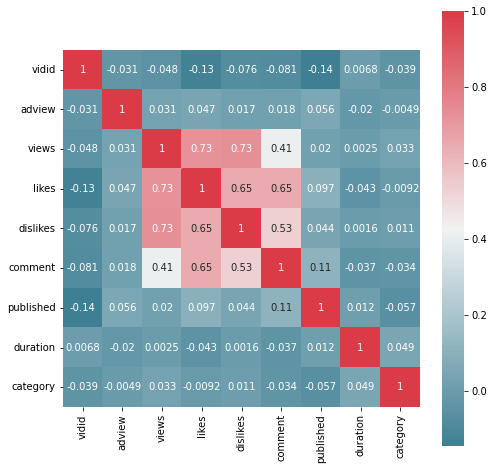

In [35]:
f, ax = plt.subplots(figsize=(8,8))
corr = data_train.corr()
sns.heatmap(corr , mask = np.zeros_like(corr , dtype = np.bool), cmap= sns.diverging_palette(220,10, as_cmap = True), square = True, ax=ax,annot = True)
plt.show()

In [36]:
# # Split Data
# Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
# data_train=data_train.drop(["adview"],axis=1)
# data_train=data_train.drop(["vidid"],axis=1)
# data_train.head()

# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()


,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,420,6
1,1707,56,2,6,2185,540,4
2,2023,25,0,2,2094,120,3
3,620860,777,161,153,2119,240,8
4,666,1,0,0,2091,0,4


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.17381264062741902

In [38]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [39]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.8322578945586
Mean Squared Error: 835653609.0203481
Root Mean Squared Error: 28907.673877715377


In [40]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

d:\Anakonda\envs\My_learn\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 3707.8322578945586
Mean Squared Error: 835653609.0203481
Root Mean Squared Error: 28907.673877715377


In [41]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)


Mean Absolute Error: 2602.9877049180327
Mean Squared Error: 958095012.6195356
Root Mean Squared Error: 30953.10990223011


In [42]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

d:\Anakonda\envs\My_learn\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3241.7940230584973
Mean Squared Error: 510171335.9297367
Root Mean Squared Error: 22586.972703966698


In [43]:
# Artificial Neural Network
import keras
from keras.layers import Dense
import tensorflow as tf 
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

#optimizer=keras.optimizers.Adam()
optimizer = tf.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()

print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 556us/step - loss: 767402048.0000 - mean_squared_error: 767402048.0000
Epoch 2/100
366/366 [==============================] - 0s 527us/step - loss: 767387648.0000 - mean_squared_error: 767387648.0000
Epoch 3/100
366/366 [==============================] - 0s 547us/step - loss: 767360576.0000 - mean_squared_error: 767360576.0000
Epoch 4/100
366/366 [==============================] - 0s 544us/step - loss: 767317760.0000 - mean_squared_error: 767317760.0000
Epoch 5/100
366/366 [==============================] - 0s 499us/step - loss: 767247232.0000 - mean_squared_error: 767247232.0000
Epoch 6/100
366/366 [==============================] - 0s 546us/step - loss: 767153472.0000 - mean_squared_error: 767153472.0000
Epoch 7/100
366/366 [==============================] - 0s 543us/step - loss: 767040448.0000 - mean_squared_error: 767040448.0000
Epoch 8/100
366/366 [==============================] - 0s 527us/step - loss: 766903360.0000 - mea

In [44]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

# Time to test the data

In [49]:
data_test = pd.read_csv("test (2).csv")

In [50]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [52]:
from tensorflow.keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [53]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [54]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [55]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [56]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [57]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train = pd.read_csv("test (2).csv")
mp= pd.read_csv("test (2).csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [58]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)


In [60]:
prediction = model.predict(X_test)

In [61]:
prediction=pd.DataFrame(prediction)
prediction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [62]:
prediction = prediction.rename(columns={0: "Adview"})

In [63]:
prediction.head()

,Adview
0,2326.134277
1,2420.159180
2,1105.244751
3,902.784424
4,2228.031494


In [64]:
prediction.to_csv('predictions.csv')